# Topic Analysis of SCOTUS Opinions

The overlap between judicial ideology and political inclinations of the appointed parties has been a consistent feature of the constitutional politics of the United States. This has caused an increased strain on the public’s acceptance of the distinction between what is considered to fall in the realm of law versus underlying political agendas. According to the Pew Research Center, Republican perceptions lean towards a moderate Supreme Court whereas Democrats believe it is mostly conservative in its decisions. Within this context, Justices of the Supreme Court of the United States (SCOTUS) should carefully consider the types of rhetoric they employ in their written statements. This project will aim to conduct an ideological analysis of the Justices of the Supreme Court and determine whether their political affiliations introduce a bias, if any, within their rulings over time. In doing so, we will identify if there are cyclical behaviors/patterns of conservatism or liberalism that could be associated with their political affiliation, the political era, or with evolving social movements in the country.

We use the dataset containing almost all the SCOTUS opinions ever written, which includes who they were written by, which case they were written for, which year they were filed, and whether it was a dissenting opinion. Using this data set, we will be able to track justices’ opinions over time. 

## Loading the Data

In [ ]:
import pandas as pd
import numpy as np

df_40 = pd.read_csv("Data/all_opinions_1940.csv")
df_40['date_filed'] = df_40['date_filed'].apply(pd.to_datetime, errors='coerce')
df_40['author_lastname'] = df_40.author_name.apply(lambda x: x.split(" ")[-1]) #get last name of each justice
df_40['author_lastname'] = np.where((df_40['author_lastname'] == 'Roberts') & (df_40['year_filed']<2005), 'Roberts, O.', df_40['author_lastname'])
df_40 = df_40[df_40['per_curiam']==False] # per curiam opinions are opinions the court deemed to be so straightforward there is no named author
df_40 = df_40.drop(columns=['Unnamed: 0','federal_cite_one','absolute_url','cluster','per_curiam'])

print(df_40.shape)
print(df_40.dtypes)
df_40.head(3)

In [2]:
from datetime import datetime
df_justice = pd.read_csv("./Data/JusticeData.csv")
df_justice = df_justice.drop(columns=['StateApptFrom'])
df_justice['JusticeLastName'] = df_justice.Name.apply(lambda x: x.split(",")[0]) #get last name of each justice
df_justice[['DateServiceTerminated','JudicialOathTaken']] = df_justice[['DateServiceTerminated','JudicialOathTaken']].apply(pd.to_datetime, errors='coerce')
df_justice['JusticeLastName'] = np.where((df_justice['JusticeLastName'] == 'Roberts') & (df_justice['DateServiceTerminated']<datetime.strptime('January 1, 2005', '%B %d, %Y')), 'Roberts, O.', df_justice['JusticeLastName'])
df_justice = df_justice[(df_justice['DateServiceTerminated'] >= datetime.strptime('January 1, 1940', '%B %d, %Y')) | (df_justice['DateServiceTerminated'].isna()==True)]
df_justice = df_justice.drop_duplicates(subset='Name', keep='first')
df_justice.fillna({'ChiefJustice': 0}, inplace=True)

print(df_justice.shape)
print(df_justice.dtypes)

(44, 6)
ChiefJustice                    float64
Name                             object
AppointedByPresident             object
JudicialOathTaken        datetime64[ns]
DateServiceTerminated    datetime64[ns]
JusticeLastName                  object
dtype: object


In [3]:
df_presidents = pd.read_csv("./Data/PresidentialParty.csv",usecols=['PRESIDENT','POLITICAL PARTY'])
print(df_presidents.shape)
print(df_presidents.dtypes)

df_presidents['LastName'] = df_presidents['PRESIDENT'].apply(lambda x: x.split(" ")[-1]) #get last name of each pres
df_presidents.loc[41, 'LastName'] = 'Bush, G. W.' #deal with weird cases of same last name 
df_presidents.loc[39, 'LastName'] = 'Bush, G. H. W.' 
df_presidents.loc[34, 'LastName'] = 'Johnson, L.'
df_presidents.loc[30, 'LastName'] = 'Roosevelt, F.'
df_presidents.loc[24, 'LastName'] = 'Roosevelt, T.'
df_presidents.loc[8, 'LastName'] = 'Harrison, W. H.'  
df_presidents.loc[5, 'LastName'] = 'Adams, J. Q.'
df_presidents.loc[1, 'LastName'] = 'Adams, J.'  

(45, 2)
PRESIDENT          object
POLITICAL PARTY    object
dtype: object


In [4]:
df_justice.AppointedByPresident = df_justice.AppointedByPresident.astype(str)
df_presidents.LastName = df_presidents.LastName.astype(str)
df_justice = df_justice.merge(df_presidents, left_on='AppointedByPresident', right_on='LastName', how='left').drop(columns=['PRESIDENT','LastName'])
df_40 = df_40.merge(df_justice, left_on='author_lastname', right_on='JusticeLastName', how="left").drop(columns=['author_lastname','JusticeLastName','Name'])

In [5]:
df_40[df_40['POLITICAL PARTY'].isna() == True] #Opinions from 1940 onwards

,author_name,category,case_name,date_filed,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,ChiefJustice,AppointedByPresident,JudicialOathTaken,DateServiceTerminated,POLITICAL PARTY
52,Justice Holmes,majority,Aikens v. Wisconsin,2005-03-04,2005,NaN,NaN,NaN,NaN,These are three writs of error to the Supreme ...,NaN,NaN,NaT,NaT,NaN
460,Justice Woods,majority,Quebec Bank of Toronto v. Hellman,2007-01-04,2007,NaN,NaN,NaN,NaN,The record discloses the following facts: Geor...,NaN,NaN,NaT,NaT,NaN
2096,Justice O2122,concurring,Peguero v. United States,1999-03-03,1999,1998-026,1.0,9.0,0.0,"I join the opinion of the Court, and I write s...",NaN,NaN,NaT,NaT,NaN
2211,Justice O2122,dissenting,Federal Employees v. Department of Interior,1999-03-03,1999,1998-030,2.0,5.0,4.0,The Court today ignores the plain meaning of t...,NaN,NaN,NaT,NaT,NaN
5491,Justice Waite,majority,Ames v. Kansas Ex Rel. Johnston,2010-03-07,2010,NaN,NaN,NaN,NaN,"He stated the facts in the foregoing language,...",NaN,NaN,NaT,NaT,NaN
6514,Justice Or,concurring,Yates v. United States,1957-06-17,1957,1956-113,2.0,6.0,1.0,Apparently what disturbs the Court now is that...,NaN,NaN,NaT,NaT,NaN
6703,Justice Connor,dissenting,Swidler & Berlin v. United States,1998-06-25,1998,1997-094,2.0,6.0,3.0,Although the attorney-client privilege ordinar...,NaN,NaN,NaT,NaT,NaN
8398,Justice And,concurring,"Moseley v. Electronic & Missile Facilities, Inc.",1963-06-17,1963,1962-146,2.0,8.0,1.0,We agree with the Court that fraud in the proc...,NaN,NaN,NaT,NaT,NaN
9627,Justice Fuller,majority,Fisher v. Baker,2010-10-09,2010,1906-017,1.0,8.0,0.0,Application for the writ of habeas corpus was ...,NaN,NaN,NaT,NaT,NaN


In [6]:
#Text field is the opinion
#important: Authorname, case_name, category, date_filed,

## Transforming Data

We are going to create lists of the authors of every case and their political affiliation. This is done to perform easier analyses of with the data and differentiating between Democratic and Republican Affilitations.

In [7]:
authors = df_40['author_name']
category = df_40['category']
case_name = df_40['case_name']
year = df_40['year_filed']
political_aff = df_40['POLITICAL PARTY']
case_txt = df_40['text']
case_id = df_40['scdb_id']

The following stop words were incorporated to avoid vocabulary that could be repeatitive among both political affiliationns. They are substracted from the datasets.

In [8]:
import re

stop_words = ['court','..','__','___','___','_','-','--','there','.',';',':','the','to','in','rt','of','a', 'for','and','is','on','amp','you','i','at','will','our','we','be','with','that','it','this','are','https','s','have','by','from','has','all','as','not','was','out','t','your','my','who','her','me','he','about','so','make','just''2','w','she','they','us','his','if','up','again','an','what','one','no','here','but','can','last','than','were','do','would','been','am','http','had','when','made','them','or','there','another','isil','aumf','youre']
w_txt = [sentence.lower().split() for sentence in case_txt]

words_txt = [[word for word in k if word not in stop_words 
            and re.match('[a-zA-Z]+$', word)] for k in w_txt]

## Counting Frequencies
The following are the frequencies of the most used words in the historical sentences given by the Supreme Court. These ones include both political parties.

In [9]:
words = [word for sentence in words_txt for word in sentence]

from collections import Counter

freq = Counter(words)
f = sorted([(freq[k],k) for k in freq], reverse = True)

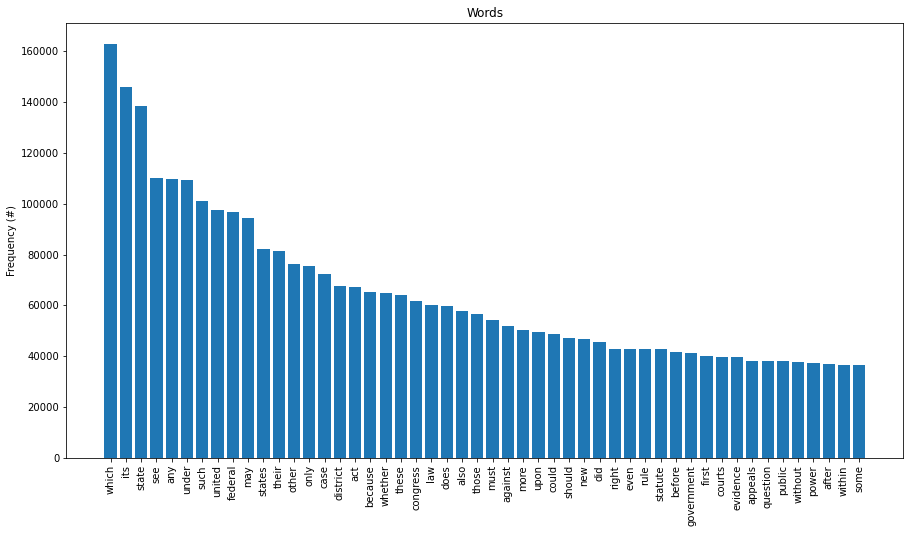

In [10]:
import matplotlib.pyplot as plt

fr = f[:50]
w_w = [k for v,k in fr]
f_w = [v for v,k in fr]
plt.figure(figsize=(15, 8))
plt.bar(w_w,f_w)
plt.ylabel("Frequency (#)")
plt.title("Words")
plt.xticks(rotation=90)
plt.show()

## Frequency of Words by Political Affiliation

The following frequencies show the top words used based on the political affiliation of the judges.

In [11]:
l = range(len(political_aff))

## DEMOCRATS

authors_D = [authors[i] for i in l if political_aff[i] == 'Democratic']
category_D = [category[i] for i in l if political_aff[i] == 'Democratic']
case_name_D = [case_name[i] for i in l if political_aff[i] == 'Democratic']
year_D = [year[i] for i in l if political_aff[i] == 'Democratic']
political_aff_D = [political_aff[i] for i in l if political_aff[i] == 'Democratic']
case_txt_D = [case_txt[i] for i in l if political_aff[i] == 'Democratic']
case_id_D = [case_id[i] for i in l if political_aff[i] == 'Democratic']
words_txt_D = [words_txt[i] for i in l if political_aff[i] == 'Democratic']

words_D = [word for sentence in words_txt_D for word in sentence]
freq_D = Counter(words_D)
f_D = sorted([(freq_D[k],k) for k in freq_D], reverse = True)
w_w_D = [k for v,k in f_D]
f_w_D = [v for v,k in f_D]

## REPUBLICANS

authors_R = [authors[i] for i in l if political_aff[i] == 'Republican']
category_R = [category[i] for i in l if political_aff[i] == 'Republican']
case_name_R = [case_name[i] for i in l if political_aff[i] == 'Republican']
year_R = [year[i] for i in l if political_aff[i] == 'Republican']
political_aff_R = [political_aff[i] for i in l if political_aff[i] == 'Republican']
case_txt_R = [case_txt[i] for i in l if political_aff[i] == 'Republican']
case_id_R = [case_id[i] for i in l if political_aff[i] == 'Republican']
words_txt_R = [words_txt[i] for i in l if political_aff[i] == 'Republican']

words_R = [word for sentence in words_txt_R for word in sentence]
freq_R = Counter(words_R)
f_R = sorted([(freq_R[k],k) for k in freq_R], reverse = True)
w_w_R = [k for v,k in f_R]
f_w_R = [v for v,k in f_R]

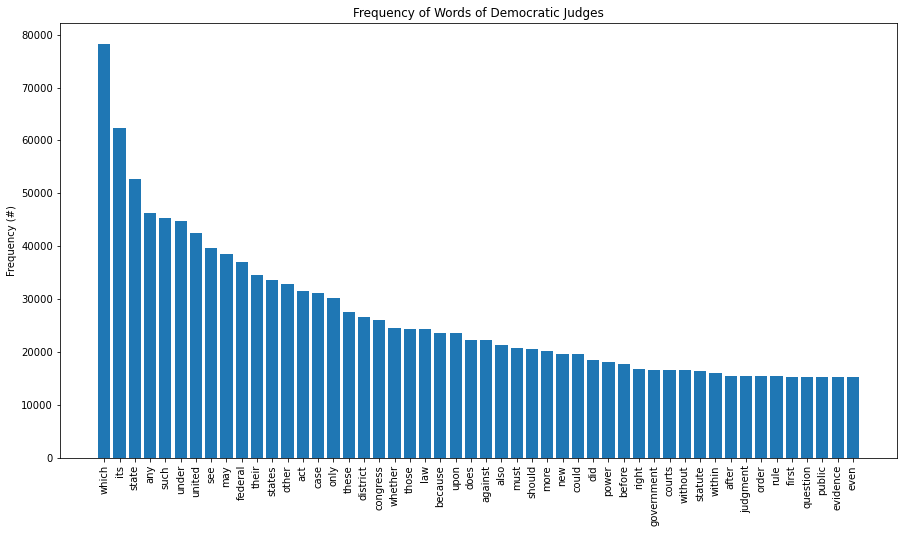

In [12]:
plt.figure(figsize=(15, 8))
plt.bar(w_w_D[:50],f_w_D[:50])
plt.title("Frequency of Words of Democratic Judges")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()

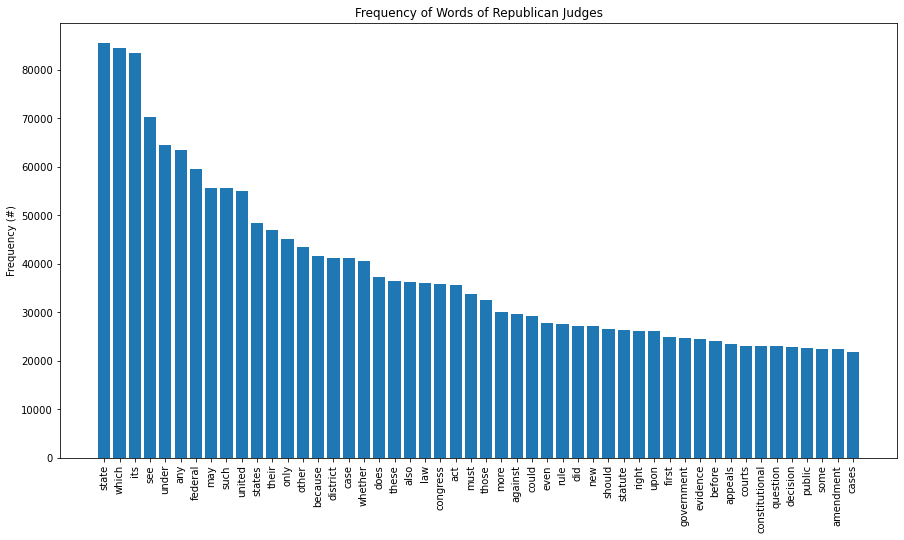

In [13]:

plt.figure(figsize=(15, 8))
plt.bar(w_w_R[:50],f_w_R[:50])
plt.title("Frequency of Words of Republican Judges")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()

### Top Words for Both Democrats and Republicans

The following graph includes both 50 top words for the sentences given by Democratic and Republican judges.

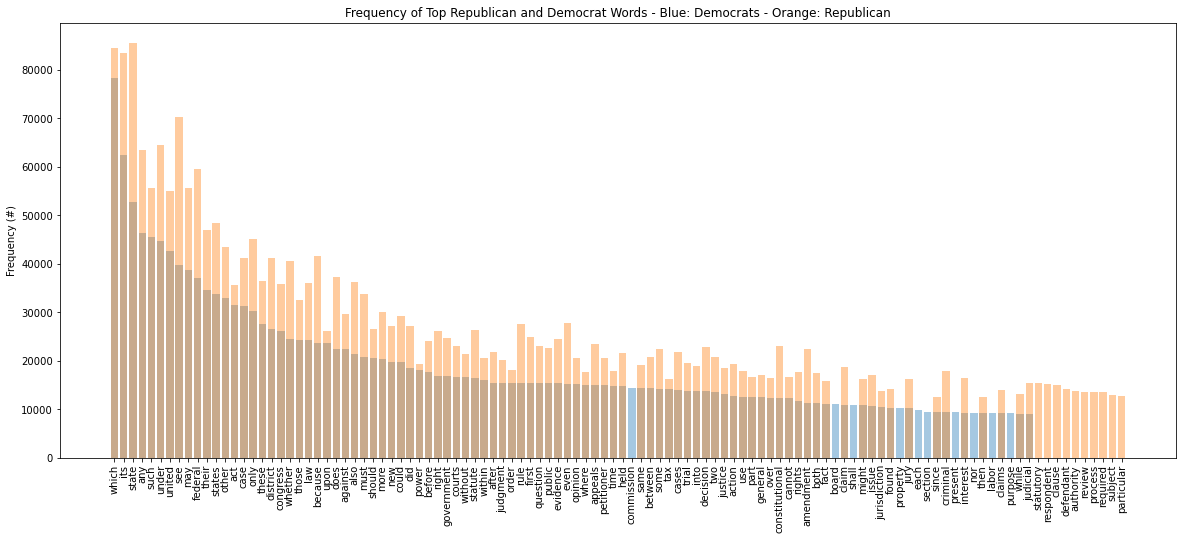

In [49]:
plt.figure(figsize=(20, 8))
plt.bar(w_w_D[:100],f_w_D[:100], alpha=0.4)
plt.bar(w_w_R[:100],f_w_R[:100], alpha=0.4)
plt.title("Frequency of Top Republican and Democrat Words - Blue: Democrats - Orange: Republican")
plt.ylabel("Frequency (#)")
plt.xticks(rotation=90)
plt.show()

## PMI

In [15]:
import math

only_words_txt = [list(set(only_words)) for only_words in words_txt] #unique words per sentence

words_one_per_sentence = [word for sentence in only_words_txt for word in sentence]
count_words = Counter(words_one_per_sentence)
total_words = len(words_one_per_sentence)

no_sentences = len(only_words_txt)

count_words = Counter(words_one_per_sentence)

count_democratic_words = Counter()
count_Republican_words = Counter()

#Probability word and Democratic
for s in range(len(only_words_txt)):
    if political_aff[s] == 'Democratic':
        for word in only_words_txt[s]:
            count_democratic_words[word] += 1
    if political_aff[s] == 'Republican':
        for word in only_words_txt[s]:
            count_Republican_words[word] += 1

prob_words = {word : (count_words[word]/no_sentences) for word in count_words}
            
prob_democratic_words = {word : (count_democratic_words[word]/no_sentences) for word in count_democratic_words}
prob_Republican_words = {word : (count_Republican_words[word]/no_sentences) for word in count_Republican_words}

prob_democratic_sentences = sum([1 for i in political_aff if i == 'Democratic'])/no_sentences
prob_republican_sentences = sum([1 for i in political_aff if i == 'Republican'])/no_sentences



In [16]:
#PMI for every word and Democrats
PMI_Words_and_Democrats = sorted([(math.log(prob_democratic_words[word]/(prob_words[word]*prob_democratic_sentences)), word) 
                                  for word in prob_words 
                                  if word in prob_democratic_words and count_democratic_words[word] > 10], reverse = True)

#PMI for every word and Republicans
PMI_Words_and_Republicans = sorted([(math.log(prob_Republican_words[word]/(prob_words[word]*prob_republican_sentences)), word) 
                                    for word in prob_words 
                                    if word in prob_Republican_words and count_Republican_words[word] > 10], reverse = True)


print("\nWords with largest PMI's for Democrats:")
for i in range(50):
    print(str(i+1) + '.', PMI_Words_and_Democrats[i][1] + ':', PMI_Words_and_Democrats[i][0])
    
print("\nWords with largest PMI's for Republicans:")
for i in range(50):
    print(str(i+1) + '.', PMI_Words_and_Republicans[i][1] + ':', PMI_Words_and_Republicans[i][0])


Words with largest PMI's for Democrats:
1. honeyman: 0.8347132151581313
2. harrow: 0.8347132151581313
3. embracive: 0.8347132151581313
4. derstand: 0.8347132151581313
5. carloads: 0.8347132151581313
6. perchance: 0.777554801318183
7. permeating: 0.7701746940205603
8. overhanging: 0.7701746940205603
9. escalator: 0.7701746940205603
10. tomkins: 0.76572034367118
11. senn: 0.76572034367118
12. recurringly: 0.76572034367118
13. ecker: 0.76572034367118
14. broderick: 0.76572034367118
15. pathmarking: 0.7640956479441783
16. minton: 0.7623925535785053
17. treinies: 0.7606052430044096
18. raft: 0.7606052430044096
19. prophetic: 0.7606052430044096
20. vitamin: 0.7546705074845951
21. sterilize: 0.7546705074845951
22. revest: 0.7546705074845951
23. choses: 0.7546705074845951
24. assail: 0.7513316062190804
25. streetcar: 0.7477018381685017
26. saturation: 0.7477018381685017
27. kaw: 0.7477018381685017
28. fauntleroy: 0.7477018381685017
29. angle: 0.7346297566011489
30. tin: 0.7234875800479071
31.

Latent Dirichlet Allocation

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)

len (df_40)
#type(df_40)

14924

In [18]:
vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words

# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df = 0.5, #discuss max_df, min_df 
                                min_df = 1,
                                stop_words ='english',
                                max_features = vocab_size)
tf = tf_vectorizer.fit_transform(df_40["text"]) #read text column only 


tf.shape

(14924, 1000)

In [19]:
type(tf)

scipy.sparse.csr.csr_matrix

In [20]:
type(tf.toarray())

numpy.ndarray

In [21]:
tf.toarray().shape

(14924, 1000)

In [22]:
print(tf_vectorizer.get_feature_names())

['000', '100', '12', '13', '14', '15', '16', '17', '18', '19', '1964', '1968', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '35', '3d', '40', '42', '45', '49', '50', '60', '___', '____', 'ability', 'able', 'absence', 'absent', 'accept', 'accepted', 'access', 'according', 'accordingly', 'account', 'accused', 'actions', 'activities', 'activity', 'acts', 'actual', 'actually', 'added', 'addition', 'additional', 'address', 'adequate', 'administration', 'administrative', 'adopted', 'affected', 'affirmed', 'age', 'agencies', 'agency', 'agent', 'agents', 'agree', 'agreed', 'agreement', 'agreements', 'aid', 'alabama', 'alien', 'alleged', 'allow', 'allowed', 'alternative', 'amended', 'amendment', 'amendments', 'american', 'analysis', 'ann', 'answer', 'ante', 'antitrust', 'app', 'apparently', 'appeal', 'appea

In [23]:
tf[0].toarray()

array([[ 35,  12,   7,   3,   7,   6,   4,   7,   3,   4,   0,   0,   1,
          3,   0,   0,   1,   2,   5,   2,   0,   0,   0,   3,   1,   0,
          0,   1,   2,   0,   0,   3,   5,   5,   3,   4,  22,  11,   8,
          6,   8,   8,   2,   2,   2,   2,   1,   3,   0,   1,   1,   8,
          1,   8,  20,   6,   1,   2,   1,   1,   4,   6,   2,   1,   3,
          0,   3,   3,   3,   0,   3,   2,   7,   5,   4,   5,   2,   0,
          0,   2,   0,   0,   0,   0,   1,   1,   0,   2,   0,   1,   2,
          0,   0,   0,   1,   0,   0,   4,   1,  37,   2,   0,   4,   4,
          1,   0,   0,   0,   0,   1,   1,   0,   3,   5,   0,   0,   8,
          1,   1,   0,   5,   1,   2,   0,   1,   0,   0,   1,   0,   2,
          2,   6,   2,   0,   1,   0,   0,   0,   0,   2,   4,   0,   0,
          3,   1,   1,   1,   1,   3,   2,   6,   0,   0,   0,   0,   0,
          5,   3,   3,   1,   1,   0,   1,   0,   9,   0,   1,   0,   0,
          8,   1,   4,   4,   6,   0,   0,   0,   0

We now fit an LDA model to the data

In [24]:
num_topics = 10 #discuss num_topics- how to pick this number 

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)

LatentDirichletAllocation(random_state=0)

In [25]:
lda.components_.shape

(10, 1000)

In [26]:
lda.components_.sum(axis=1)

array([1065810.10973,  717972.07193, 1236537.70554,  401094.28337,
       1089181.47777, 1223631.15371,  845530.30748,  997938.71891,
        813510.39052,  849528.78104])

In [27]:
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [28]:
topic_word_distributions.shape

(10, 1000)

In [29]:
topic_word_distributions.sum(axis=1) #We can verify that each topic's word distribution sums to 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
print(topic_word_distributions[0]) #probabilities for the different words are for a specific topic

[0.00035 0.00055 0.00369 0.00358 0.00324 0.00312 0.00306 0.00264 0.0041
 0.00176 0.00022 0.00044 0.00015 0.00029 0.00021 0.00036 0.00025 0.0003
 0.00051 0.00037 0.00043 0.00056 0.0006  0.00042 0.00048 0.00103 0.00099
 0.00062 0.00092 0.00111 0.00082 0.00222 0.00217 0.0016  0.0013  0.00121
 0.00131 0.00113 0.00118 0.00077 0.00079 0.00125 0.00083 0.00067 0.00079
 0.00119 0.00869 0.00071 0.00063 0.00052 0.00049 0.00048 0.0003  0.00863
 0.01108 0.00079 0.00114 0.00069 0.00061 0.00037 0.0003  0.00048 0.00086
 0.00067 0.00086 0.00007 0.00067 0.00014 0.00104 0.00054 0.00133 0.00092
 0.00266 0.00064 0.00082 0.00148 0.00013 0.00009 0.00015 0.00086 0.00005
 0.00029 0.00151 0.00009 0.00027 0.00065 0.00151 0.00177 0.00042 0.00015
 0.00001 0.0001  0.00014 0.00026 0.0003  0.0008  0.00041 0.00084 0.00008
 0.01171 0.00026 0.00144 0.00285 0.00217 0.00081 0.01438 0.      0.0032
 0.00041 0.00003 0.00045 0.00066 0.      0.      0.00002 0.      0.00043
 0.00163 0.00151 0.00192 0.00297 0.00131 0.00344 0.000

In [31]:
num_top_words = 20 #double check 

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
ante : 0.014383966998849595
amendment : 0.011705243235609435
dissenting : 0.011235126472551836
cite : 0.011227570772179238
____ : 0.011081655490585943
police : 0.010528257551879576
search : 0.010272625770296627
majority : 0.008941156076702875
3d : 0.008691359656120667
___ : 0.008626378348199565
fourth : 0.00845389646510643
patent : 0.008318273512571767
person : 0.007526516775731911
officers : 0.0071032067815824055
warrant : 0.007101842195062762
ing : 0.007096135726106962
brief : 0.006865488510064639
tion : 0.006727742553072615
cause : 0.006493547942400881
officer : 0.006364477132735985

[Topic 1]
tax : 0.048369229964313365
property : 0.03444981830460741
income : 0.017642827549138936
value : 0.011606954139643966
bank : 0.011376152300679298
taxes : 0.010647029808492262
bankruptcy : 0.009893767668602602
trust : 0.008604793750893524
corporation : 0.008065578640044917
business : 0.008011790144813005

In [32]:
doc_topic_matrix = lda.transform(tf)

In [33]:
doc_topic_matrix.shape

(14924, 10)

In [34]:
doc_topic_matrix[0]

array([0.24643, 0.04406, 0.0084 , 0.0269 , 0.00004, 0.39379, 0.00004,
       0.00004, 0.27301, 0.00729])

In [35]:
df_40.columns

Index(['author_name', 'category', 'case_name', 'date_filed', 'year_filed',
       'scdb_id', 'scdb_decision_direction', 'scdb_votes_majority',
       'scdb_votes_minority', 'text', 'ChiefJustice', 'AppointedByPresident',
       'JudicialOathTaken', 'DateServiceTerminated', 'POLITICAL PARTY'],
      dtype='object')

In [36]:
# pip install https://github.com/sulunemre/word_cloud/releases/download/2/wordcloud-0.post1+gd8241b5-cp39-cp39-win_amd64.whl

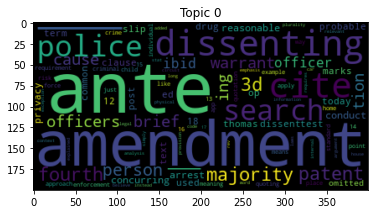

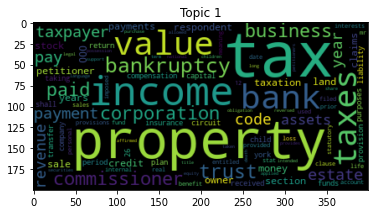

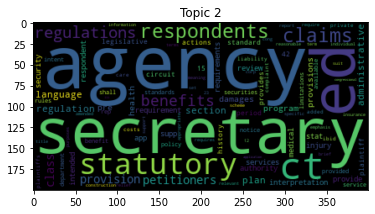

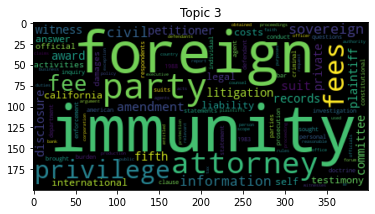

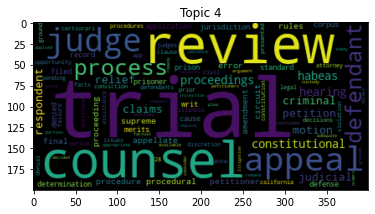

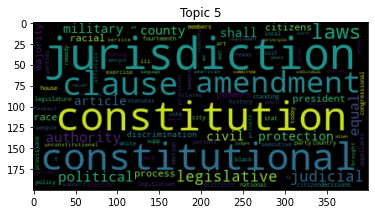

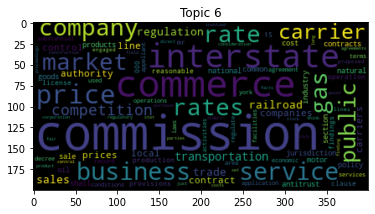

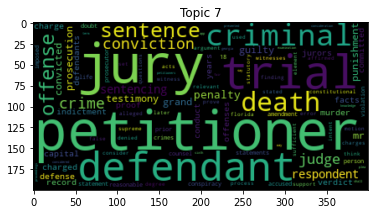

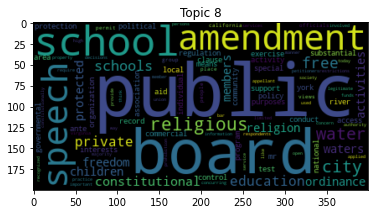

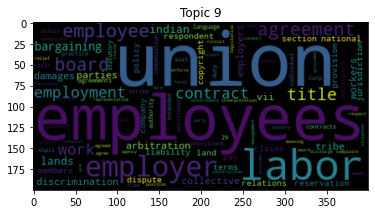

In [37]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)

### Co-occurence of words

### Next, we Here, we count the number of cases in which two common words occur. For example, union and employees. Abortion and Reproduction, etc.

In [38]:
word1 = 'union'
word2 = 'employees'

word1_column_idx = tf_vectorizer.vocabulary_[word1]
word2_column_idx = tf_vectorizer.vocabulary_[word2]

In [39]:
np.array(tf.todense())

tf[:, word1_column_idx].toarray()

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [40]:
documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2

In [41]:
eps = 0.1
np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

-1.2183030973291757

In [42]:
def prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
    documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

In [43]:
def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx, ']', sep='')
        
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        if verbose:
            print('Coherence:', coherence)
            print()
        average_coherence += coherence
    average_coherence /= num_topics
    if verbose:
        print('Average coherence:', average_coherence)
    return average_coherence

In [44]:
compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, True)

[Topic 0]
Coherence: -667.1759261935832

[Topic 1]
Coherence: -658.8842872335003

[Topic 2]
Coherence: -597.6653602587531

[Topic 3]
Coherence: -811.9374397216801

[Topic 4]
Coherence: -439.5644562334316

[Topic 5]
Coherence: -507.69814586926196

[Topic 6]
Coherence: -672.7997825072547

[Topic 7]
Coherence: -497.16648303218255

[Topic 8]
Coherence: -760.5194855809166

[Topic 9]
Coherence: -844.0267306817085

Average coherence: -645.7438097312272


-645.7438097312272